In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Phishing/url_dataset.csv')
data.head()

,Unnamed: 0,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target,real_website
0,22,8658748,https://8766945.cn,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T06:17:50+00:00,yes,2024-07-16T06:23:19+00:00,yes,Development Bank of Singapore,https://www.dbs.com/
1,28,8658738,http://allegrolokalnie.oferta48582.pl,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T05:38:29+00:00,yes,2024-07-16T05:53:02+00:00,yes,Allegro,https://www.allegro.pl/
2,47,8658711,http://verificarclik.hstn.me/?i=1,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T03:41:14+00:00,yes,2024-07-16T03:53:02+00:00,yes,Microsoft,https://www.microsoft.com/
3,48,8658710,http://verificarclik.hstn.me/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T03:40:55+00:00,yes,2024-07-16T03:53:02+00:00,yes,Microsoft,https://www.microsoft.com/
4,54,8658704,https://pub-11ff98798ea64bc2be10ec3960eae66c.r...,http://www.phishtank.com/phish_detail.php?phis...,2024-07-16T03:39:23+00:00,yes,2024-07-16T03:43:00+00:00,yes,Microsoft,https://www.microsoft.com/


In [ ]:
# Keep only relevant columns
data = data[['url', 'real_website']]

# Rename columns for clarity
data.columns = ['phished_url', 'legitimate_url']

# Drop rows with missing values (if any)
data.dropna(inplace=True)

print(data.head())


                                         phished_url  \
0                                 https://8766945.cn   
1              http://allegrolokalnie.oferta48582.pl   
2                  http://verificarclik.hstn.me/?i=1   
3                      http://verificarclik.hstn.me/   
4  https://pub-11ff98798ea64bc2be10ec3960eae66c.r...   

               legitimate_url  
0        https://www.dbs.com/  
1     https://www.allegro.pl/  
2  https://www.microsoft.com/  
3  https://www.microsoft.com/  
4  https://www.microsoft.com/  


<ipython-input-3-86bef20d537c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
data

,phished_url,legitimate_url
0,https://8766945.cn,https://www.dbs.com/
1,http://allegrolokalnie.oferta48582.pl,https://www.allegro.pl/
2,http://verificarclik.hstn.me/?i=1,https://www.microsoft.com/
3,http://verificarclik.hstn.me/,https://www.microsoft.com/
4,https://pub-11ff98798ea64bc2be10ec3960eae66c.r...,https://www.microsoft.com/
...,...,...
5182,http://creativeingredient.com/wp-includes/imag...,https://www.paypal.com/
5183,http://creditiperhabbogratissicuro100.blogspot...,https://www.sulake.com/
5184,http://www.imxprs.com/free/outlookwebaccessupg...,https://www.microsoft.com/
5185,http://www.habbocreditosparati.blogspot.com/,https://www.sulake.com/


more complex


In [ ]:
import re
from urllib.parse import urlparse
import math

def extract_advanced_features(url):
    parsed = urlparse(url)
    features = {
        'url_length': len(url),
        'num_dots': url.count('.'),
        'num_hyphens': url.count('-'),
        'num_at': url.count('@'),
        'num_question_marks': url.count('?'),
        'num_equals': url.count('='),
        'num_underscores': url.count('_'),
        'num_ampersands': url.count('&'),
        'num_percent': url.count('%'),
        'num_digits': sum(c.isdigit() for c in url),
        'num_letters': sum(c.isalpha() for c in url),
        'num_path_tokens': len(parsed.path.split('/')),
        'domain_length': len(parsed.netloc),
        'tld': parsed.netloc.split('.')[-1] if parsed.netloc else '',
        'has_https': int(parsed.scheme == 'https'),
        'num_subdomains': len(parsed.netloc.split('.')) - 1,
        'has_ip': int(bool(re.match(r'\d+\.\d+\.\d+\.\d+', parsed.netloc))),
        'num_encoded_chars': len(re.findall(r'%[0-9A-Fa-f]{2}', url)),
        'url_entropy': sum(-p * math.log2(p) for p in (url.count(c)/len(url) for c in set(url)) if p > 0),
        'has_suspicious_words': int(any(word in url.lower() for word in ['login', 'signin', 'bank', 'account', 'secure', 'update'])),
    }
    return features

# Extract features for each URL
phished_features = pd.DataFrame([extract_advanced_features(url) for url in data['phished_url']])
legitimate_features = pd.DataFrame([extract_advanced_features(url) for url in data['legitimate_url']])

KeyError: 'phished_url'

In [ ]:
phished_features['label']=1
legitimate_features['label']=0

In [ ]:
data = pd.merge(phished_features, legitimate_features, how='outer')

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data

,url_length,num_dots,num_hyphens,num_at,num_question_marks,num_equals,num_underscores,num_ampersands,num_percent,num_digits,num_letters,num_path_tokens,domain_length,has_https,num_subdomains,has_ip,num_encoded_chars,url_entropy,has_suspicious_words,label
0,20,2,0,0,0,0,0,0,0,0,14,2,11,1,2,0,0,3.546439,0,0
1,37,2,0,0,0,0,0,0,0,0,31,2,19,1,1,0,0,3.905003,0,1
2,21,2,0,0,0,0,0,0,0,0,15,2,12,1,2,0,0,3.653757,0,0
3,69,5,0,0,0,0,0,0,0,2,55,5,33,1,4,0,0,4.329610,0,1
4,47,3,0,0,0,0,0,0,0,5,35,2,38,1,3,0,0,4.307159,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,58,3,4,0,0,0,0,0,0,7,40,2,49,1,3,0,0,4.579723,0,1
9364,66,3,5,0,0,0,0,0,0,2,52,2,57,1,3,0,0,4.344197,0,1
9365,26,2,0,0,0,0,0,0,0,0,20,2,17,1,2,0,0,3.661226,0,0
9366,25,2,0,0,0,0,0,0,0,0,19,2,16,1,2,0,0,3.653661,0,1


In [ ]:
data.drop(['tld'], axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)
print(y)

      url_length  num_dots  num_hyphens  num_at  num_question_marks  \
0             20         2            0       0                   0   
1             37         2            0       0                   0   
2             21         2            0       0                   0   
3             69         5            0       0                   0   
4             47         3            0       0                   0   
...          ...       ...          ...     ...                 ...   
9363          58         3            4       0                   0   
9364          66         3            5       0                   0   
9365          26         2            0       0                   0   
9366          25         2            0       0                   0   
9367          22         2            0       0                   0   

      num_equals  num_underscores  num_ampersands  num_percent  num_digits  \
0              0                0               0            0       

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-validation Accuracy: 0.9616 (+/- 0.0087)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.9626
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       963
           1       0.99      0.94      0.96       911

    accuracy                           0.96      1874
   macro avg       0.96      0.96      0.96      1874
weighted avg       0.96      0.96      0.96      1874



Random Forest Cross-validation Accuracy: 0.9925 (+/- 0.0016)
Random Forest Test Accuracy: 0.9947
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       963
           1       0.99      0.99      0.99       911

    accuracy                           0.99      1874
   macro avg       0.99      0.99      0.99      1874
weighted avg       0.99      0.99      0.99      1874



Gradient Boosting Cross-validation Accuracy: 0.9821 (+/- 0.0045)
Gradient Boosting Test Accuracy: 0.9824
              precision    recall  f1-score   support

           0       0.97      0.99      0.98

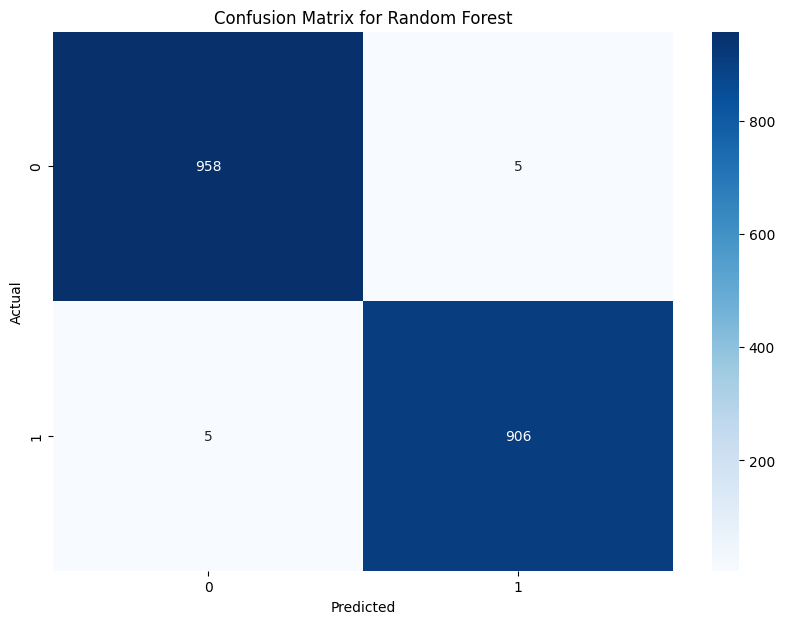

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize variables to keep track of the best model
best_accuracy = 0
best_model_name = ''
best_y_pred = None

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(kernel='rbf'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
}

# Train and evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-validation Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Check if this model is the best so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = name
        best_y_pred = y_pred

# After the loop, plot the confusion matrix for the best model
print(f"The best performing model was {best_model_name} with an accuracy of {best_accuracy:.4f}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, best_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Top 10 most important features:
                 feature    importance
17           url_entropy  2.811498e-01
0             url_length  1.783308e-01
10           num_letters  1.520527e-01
9             num_digits  1.219372e-01
12         domain_length  9.316117e-02
14        num_subdomains  4.823993e-02
2            num_hyphens  4.444866e-02
1               num_dots  4.438451e-02
11       num_path_tokens  1.982888e-02
13             has_https  7.558566e-03
18  has_suspicious_words  4.744328e-03
4     num_question_marks  1.965179e-03
5             num_equals  1.163261e-03
6        num_underscores  6.587378e-04
7         num_ampersands  2.288185e-04
15                has_ip  1.473564e-04
3                 num_at  1.548683e-07
8            num_percent  0.000000e+00
16     num_encoded_chars  0.000000e+00


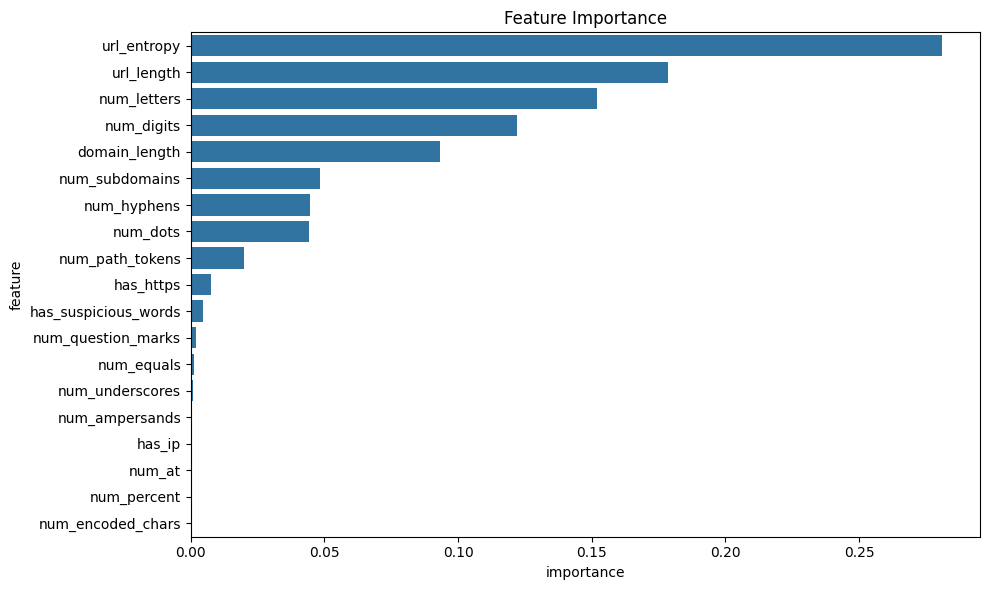

In [ ]:
# For Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Example for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("Best cross-validation score:", rf_random.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Best cross-validation score: 0.9806506518364267


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9695837780149413
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       925
           1       1.00      0.94      0.97       949

    accuracy                           0.97      1874
   macro avg       0.97      0.97      0.97      1874
weighted avg       0.97      0.97      0.97      1874



In [ ]:
def predict_url(url, model, training_columns): # Add training_columns as argument
    # Extract features from the URL
    features = extract_advanced_features(url)

    # Convert to DataFrame with correct column names
    features_df = pd.DataFrame([features], columns=training_columns) # Use training_columns here

    # Make prediction
    prediction = model.predict(features_df)[0]

    # Convert numeric prediction to label
    label = "Phishing" if prediction == 1 else "Legitimate"

    return label

# When calling predict_url, pass the column names from your training data


In [ ]:
test_url = "http://verificarclik.hstn.me/?i=1"
actual_label = "Phishing"  # You would know this

predicted_label = predict_url(test_url, rf_model, X_train.columns)

print(f"URL: {test_url}")
print(f"Actual: {actual_label}")
print(f"Predicted: {predicted_label}")
print("Correct" if predicted_label == actual_label else "Incorrect")

URL: http://verificarclik.hstn.me/?i=1
Actual: Phishing
Predicted: Phishing
Correct
